In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("netflix_titles.csv", encoding='utf-8')

In [3]:
# Drop nulls in critical columns
df = df.dropna(subset=['listed_in', 'duration', 'rating'])

# 1. Top Genres
from collections import Counter

# Split multiple genres in 'listed_in'
genre_list = df['listed_in'].str.split(', ').sum()
top_genres = pd.Series(Counter(genre_list)).sort_values(ascending=False).head(10)


In [5]:
# 2. Release Year Trends
year_trend = df['release_year'].value_counts().sort_index()

In [7]:
# 3. Duration Parsing
# For Movies (e.g., "90 min")
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['minutes'] = movie_df['duration'].str.extract(r'(\d+)').astype(float)

# For TV Shows (e.g., "2 Seasons")
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['duration'].str.extract(r'(\d+)').astype(float)

In [9]:
# 4. Binge-worthy TV Shows (More Seasons)
top_tv_shows = tv_df.sort_values(by='seasons', ascending=False).head(10)

In [11]:
# 5. Ratings vs Genres
genre_rating_df = df[['listed_in', 'rating']].copy()
genre_rating_df['genre'] = genre_rating_df['listed_in'].str.split(',').str[0]
rating_counts = genre_rating_df.groupby(['genre', 'rating']).size().unstack().fillna(0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies')])

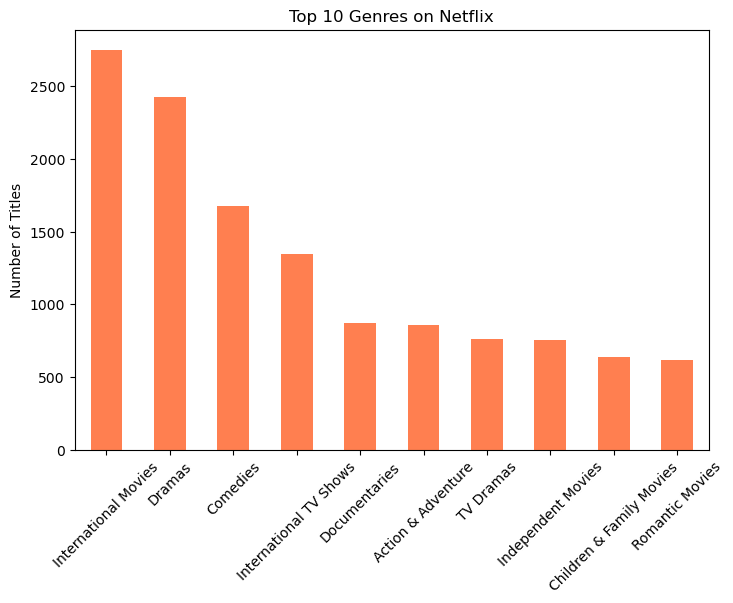

In [13]:
# Visualization
plt.figure(figsize=(18, 12))

# Top Genres
plt.subplot(2, 2, 1)
top_genres.plot(kind='bar', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

Text(0, 0.5, 'Number of Titles')

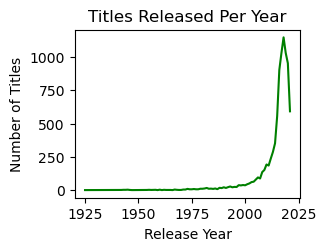

In [15]:
# Release Year Trends
plt.subplot(2, 2, 2)
year_trend.plot(kind='line', color='green')
plt.title('Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

Text(0.5, 0, 'Duration (min)')

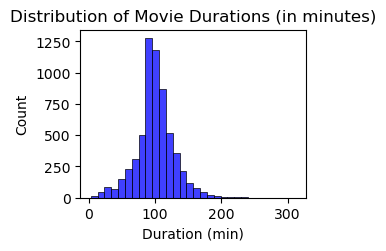

In [17]:
# Movie Duration Distribution
plt.subplot(2, 2, 3)
sns.histplot(movie_df['minutes'], bins=30, color='blue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (min)')

C:\Users\shaik\AppData\Local\Temp\ipykernel_17096\3054393602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_df, x='seasons', palette='Set2')


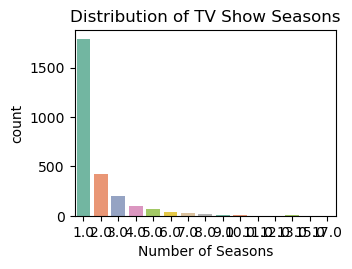

In [19]:
# TV Show Seasons Distribution
plt.subplot(2, 2, 4)
sns.countplot(data=tv_df, x='seasons', palette='Set2')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')

plt.tight_layout()
plt.show()

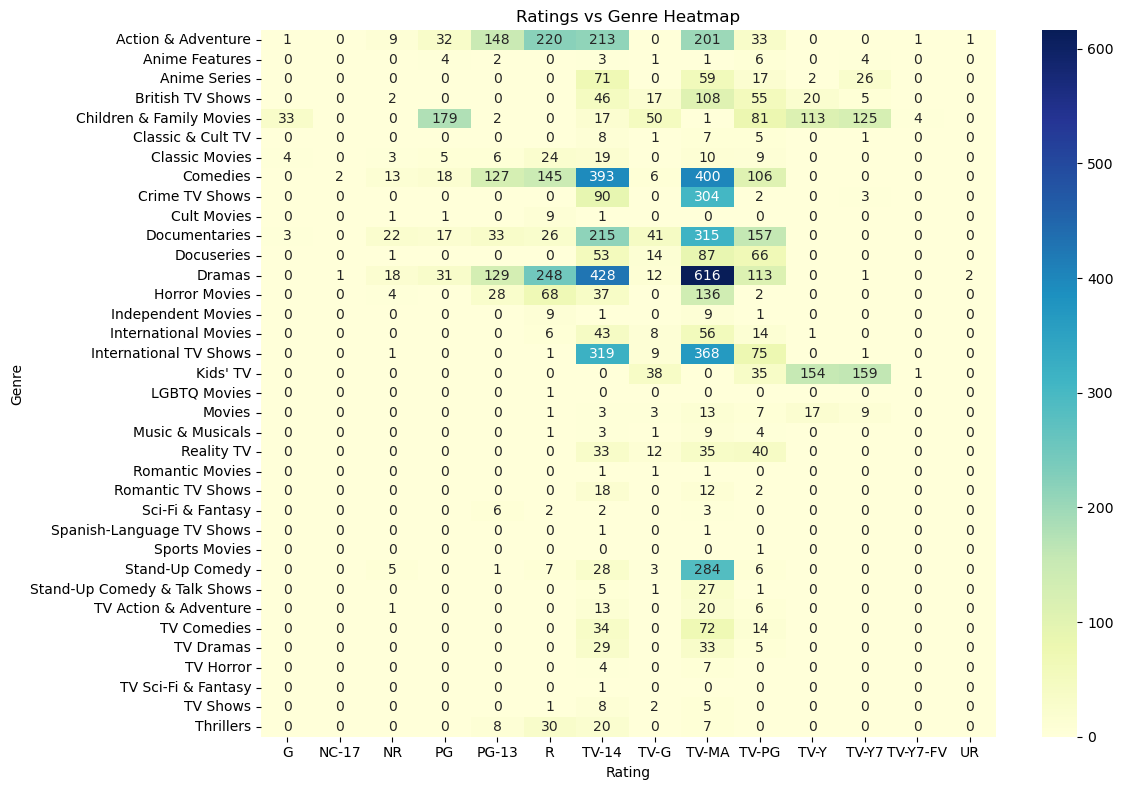

In [21]:
# Heatmap of Ratings vs Genres
plt.figure(figsize=(12, 8))
sns.heatmap(rating_counts, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Ratings vs Genre Heatmap")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()